In [22]:
## Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import country_converter as coco


In [2]:
## Importing data
path = r"C:\Users\minhh\Documents\Python Project\Data_Science_Salary\ds_salaries.csv"
path_convert = path.replace("\\","/")
salary_df = pd.read_csv(path_convert)

In [3]:
## Have a look at the data
print(salary_df.shape)
salary_df.info()
salary_df.head()

(3755, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


- We have 11 columns and 3755 rows. 
- 4 numeric columns and 7 categorical columns. 
- There are already column 'salary_in_usd' so the 'salary' and 'salary_currency' is no more needed. Let's drop it.

In [4]:
## Drop 2 unnecessary column
salary_df = salary_df.drop(columns=['salary','salary_currency'],axis = 1)

In [5]:
salary_df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Wow, there's no null value in any column in the dataframe! That's nice. 

Let's deal with categorical column first.

In [6]:
print(salary_df['experience_level'].unique())
print(salary_df['employment_type'].unique())

['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']


There're 4 categorical values in column 'experience_level': 
- EN: Entry-level
- MI: Mid-level
- SE: Senior-level 
- EX: Executive-level

Column 'employment_type' also have 4 categorical values: 
- FT: Full-time
- PT: Part-time
- FL: Freelance 
- CT: Contract

Let's replace short name with full name for easier understanding. 


In [7]:
# Update column experience_level
salary_df['experience_level'] = salary_df['experience_level'].replace('EN','entry_level')
salary_df['experience_level'] = salary_df['experience_level'].replace('MI','mid_level')
salary_df['experience_level'] = salary_df['experience_level'].replace('SE','senior_level')
salary_df['experience_level'] = salary_df['experience_level'].replace('EX','executive_level')

# Update column employment_type
salary_df['employment_type'] = salary_df['employment_type'].replace('FT','full_time')
salary_df['employment_type'] = salary_df['employment_type'].replace('PT','part_time')
salary_df['employment_type'] = salary_df['employment_type'].replace('FL','freelance')
salary_df['employment_type'] = salary_df['employment_type'].replace('CT','contract')

print("Experience Level: ")
print(salary_df['experience_level'].unique())
print("Employment Type: ")
print(salary_df['employment_type'].unique())


Experience Level: 
['senior_level' 'mid_level' 'entry_level' 'executive_level']
Employment Type: 
['full_time' 'contract' 'freelance' 'part_time']


  experience_level  count
0     senior_level   2516
1        mid_level    805
2      entry_level    320
3  executive_level    114


<Axes: xlabel='experience_level', ylabel='count'>

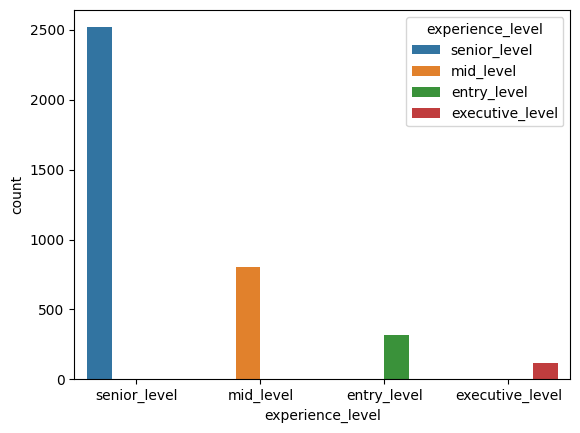

In [8]:
# Visual job by experience level
job_by_experience_level =  salary_df['experience_level'].value_counts().reset_index(drop=False)

print(job_by_experience_level)

sns.barplot(data = job_by_experience_level, x = 'experience_level', y = 'count', hue = 'experience_level')

- Senior level have the most job, next is mid level. Followed by entry level and executive level have the least job. 

  employment_type  count
0       full_time   3718
1       part_time     17
2        contract     10
3       freelance     10


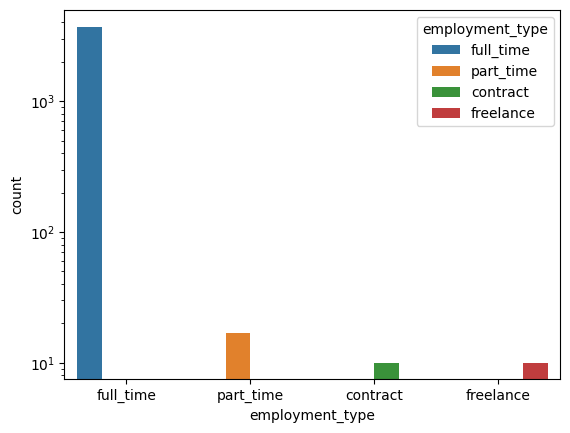

In [9]:
#Visualize job by employment type 
job_by_employment =  salary_df['employment_type'].value_counts().reset_index(drop=False)

print(job_by_employment)

sns.barplot(data = job_by_employment, x = 'employment_type', y = 'count', hue = 'employment_type')
plt.yscale('log')

- It's likely there're only job for full time employment type, the others are quite rare. 

                   job_title  count
0              Data Engineer   1040
1             Data Scientist    840
2               Data Analyst    612
3  Machine Learning Engineer    289
4         Analytics Engineer    103
5             Data Architect    101
6         Research Scientist     82
7       Data Science Manager     58
8          Applied Scientist     58
9          Research Engineer     37


<Axes: xlabel='count', ylabel='job_title'>

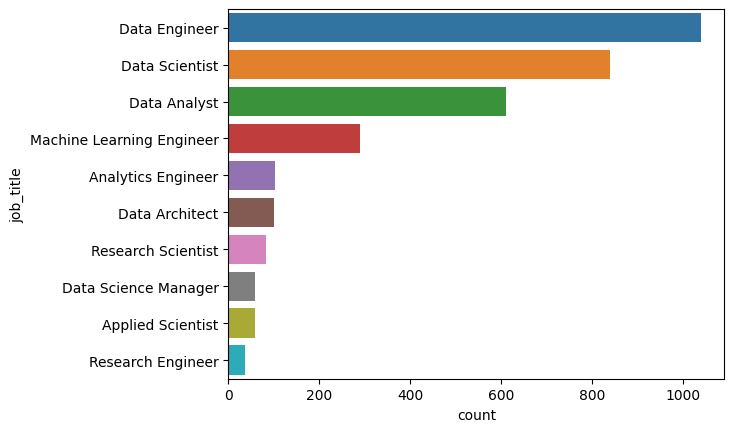

In [10]:
#Visualize job by job title
job_by_title =  salary_df['job_title'].value_counts().reset_index(drop=False).head(10)

print(job_by_title)

sns.barplot(data = job_by_title, y = 'job_title', x = 'count')

- You can notice that Data Engineer, Data Scientist and Data Analyst contribute for most of the job. 

  country  employee_residence  company_location
0      US                3040              3004
1      GB                 172               167
2      CA                  87                85
3      ES                  77                80
4      IN                  58                71
5      DE                  56                48
6      FR                  34                38
7      BR                  15                18
8      AU                  14                11
9      GR                  14                16


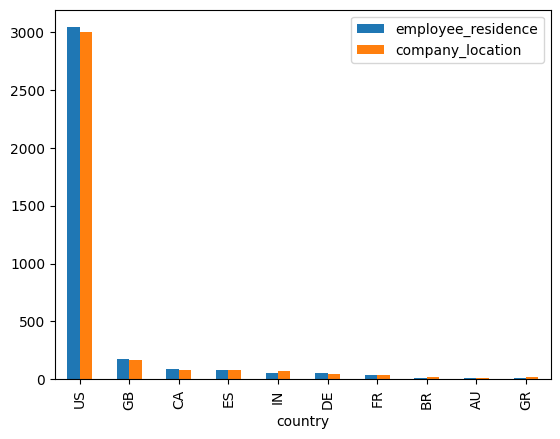

In [11]:
#Visualize job by employee residence and company location
job_by_employee_residence =  salary_df['employee_residence'].value_counts().reset_index(drop=False)
job_by_company_location =  salary_df['company_location'].value_counts().reset_index(drop=False)
job_by_company_employee = job_by_company_location.merge(job_by_employee_residence, left_on = 'company_location', right_on = 'employee_residence',
                                                        how = 'inner', suffixes = ['_employee','_company']).drop(columns='employee_residence')
job_by_company_employee = job_by_company_employee.rename(columns = {'company_location':'country','count_employee':'employee_residence',
                                                                    'count_company':'company_location' }).head(10)
print(job_by_company_employee)
job_by_company_employee.set_index('country').plot.bar()
plt.show()

- USA leads in terms of both employee residence and company location, followed by England and Canada. Most country have a similar number of employee residences and company locations.

  company_size  count
0            M   3153
1            L    454
2            S    148


<Axes: xlabel='company_size', ylabel='count'>

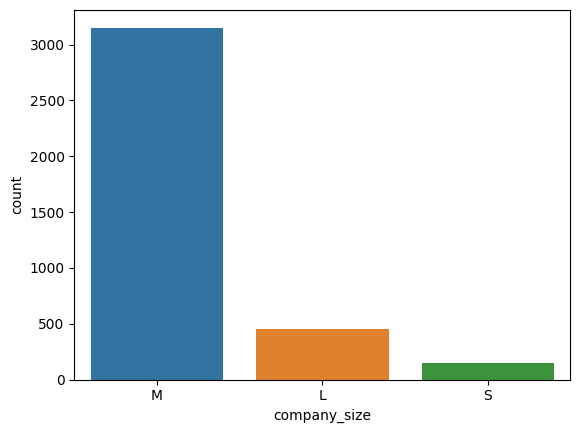

In [12]:
#Visualize company size 
job_by_company_size =  salary_df['company_size'].value_counts().reset_index(drop=False)

print(job_by_company_size)

sns.barplot(data = job_by_company_size, x = 'company_size', y = 'count')

- Most company are a medium company and there's not so many small company

   work_year  count
0       2023   1785
1       2022   1664
2       2021    230
3       2020     76


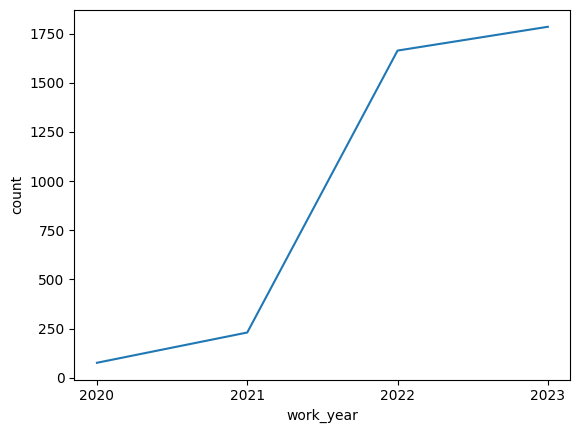

In [13]:
# Visualize number of data job overtime
job_by_year =  salary_df['work_year'].value_counts().reset_index(drop=False)

print(job_by_year)

sns.lineplot(data = job_by_year, x = 'work_year', y = 'count')
plt.xticks([2020,2021,2022,2023])
plt.show()

Wow there's a significant increase from 2021 to 2022.

In [14]:
print(salary_df['remote_ratio'].value_counts())

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64


In [15]:
# Remote ratio analyst
salary_df['remote_ratio'] = salary_df['remote_ratio'].replace({0:'onsite',50:'hybrid',100:'remote'})
salary_df = salary_df.rename(columns={'remote_ratio':'working_type'})
print(salary_df['working_type'].unique())

['remote' 'onsite' 'hybrid']


  working_type  count
0       onsite   1923
1       remote   1643
2       hybrid    189


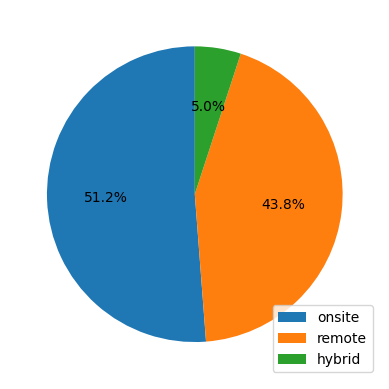

In [16]:
# Visalize job by working type
job_by_working_type = salary_df['working_type'].value_counts().reset_index(drop = False) 
print(job_by_working_type)
plt.pie(job_by_working_type['count'], labels = job_by_working_type['working_type'], startangle=90, autopct='%1.1f%%',labeldistance=None)
plt.legend()
plt.show()


- More than 50% company prefer work onsite fully, 43% let employee work remote and only 5% company are hybrid.

In [17]:
# Lets see how the average salary of the top 5 job change over year
salary_top_5_job = salary_df.merge(job_by_title.head(5), left_on = 'job_title', right_on = 'job_title', how = 'inner')
median_salary_top_5_job_year = salary_top_5_job.groupby(['job_title','work_year'])['salary_in_usd'].median().reset_index(drop=False)

#pivot job salary 
pivot_salary_job_year = pd.pivot(data = median_salary_top_5_job_year, values = 'salary_in_usd', columns = ['job_title'], index = ['work_year']).reset_index(drop = False)
print(pivot_salary_job_year)

job_title  work_year  Analytics Engineer  Data Analyst  Data Engineer   
0               2020                 NaN       34784.0        70139.0  \
1               2021                 NaN       71786.0        86264.0   
2               2022            135000.0      109000.0       135000.0   
3               2023            166000.0      106800.0       144000.0   

job_title  Data Scientist  Machine Learning Engineer  
0                 62726.0                   144000.0  
1                 74387.0                    70132.5  
2                140400.0                   145000.0  
3                155500.0                   151769.0  


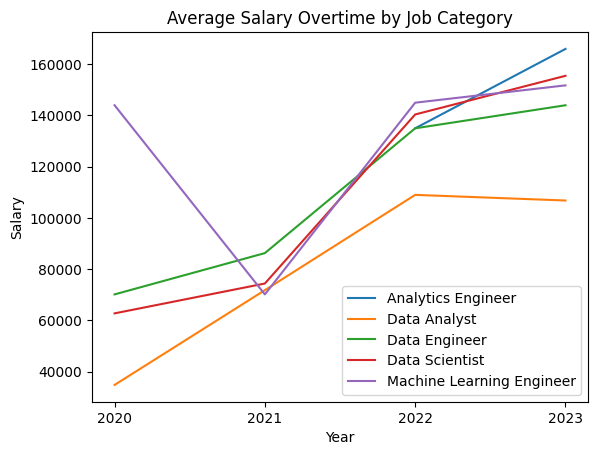

In [18]:
# Visualize top 5 job median salary over year 
plt.plot(pivot_salary_job_year['work_year'], pivot_salary_job_year['Analytics Engineer'], label='Analytics Engineer')
plt.plot(pivot_salary_job_year['work_year'], pivot_salary_job_year['Data Analyst'], label='Data Analyst')
plt.plot(pivot_salary_job_year['work_year'], pivot_salary_job_year['Data Engineer'], label='Data Engineer')
plt.plot(pivot_salary_job_year['work_year'], pivot_salary_job_year['Data Scientist'], label='Data Scientist')
plt.plot(pivot_salary_job_year['work_year'], pivot_salary_job_year['Machine Learning Engineer'], label='Machine Learning Engineer')

plt.xlabel('Year')
plt.xticks([2020,2021,2022,2023])
plt.ylabel('Salary')
plt.title('Average Salary Overtime by Job Category')
plt.legend()

plt.show()

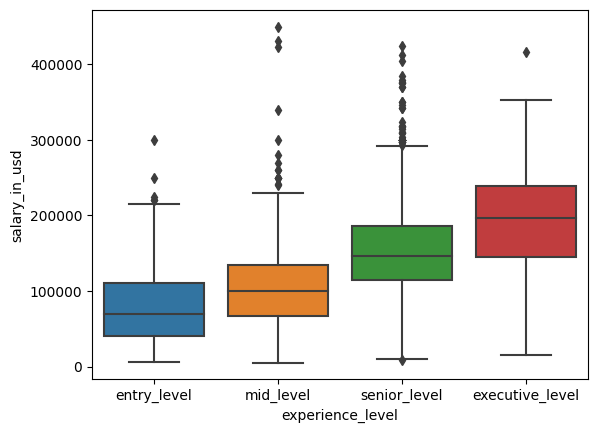

In [19]:
# Salary by experience level 
sns.boxplot(data = salary_df, x = 'experience_level', y = 'salary_in_usd',
            order = ['entry_level','mid_level','senior_level','executive_level'])

plt.show()

Wow, mostly the salary increase when you have a higher experience level, however there're some outliners in mid_level and senior_level.

In [29]:
#Salary by company location
salary_df['company_location'] = coco.convert(names = salary_df['company_location'], to = "ISO3")
salary_by_company_location = salary_df.groupby('company_location')['salary_in_usd'].mean().reset_index(drop = False).sort_values('salary_in_usd',ascending=False)
fig = px.choropleth(data_frame = salary_by_company_location, locations = 'company_location', color = 'salary_in_usd',color_continuous_scale=px.colors.sequential.YlGn)
fig.show()